In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Read the MNIST CSV dataset
csv_file_path = 'path/to/your/mnist.csv'
df = pd.read_csv(csv_file_path)

# Step 2: Drop the label column
# Assuming the last column is the label, we drop it
df.drop(df.columns[-1], axis=1, inplace=True)

# Step 3: Select a random row
random_row = df.sample(n=1).iloc[0]

# Convert the selected row to a NumPy array
# Assuming the image data is stored in the first column (index 0)
image_array = np.array(random_row).reshape((28, 28))

plt.imshow(image_array, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

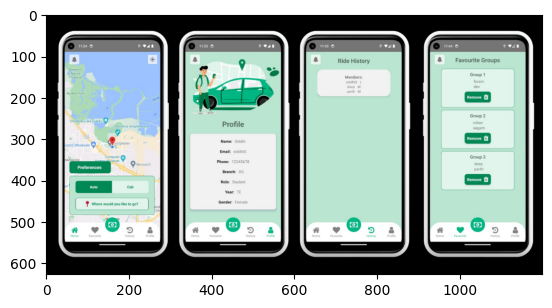

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

image=mpimg.imread("/content/4.png")
plt.imshow(image)

170498071/170498071 [==============================] - 2s 0us/step


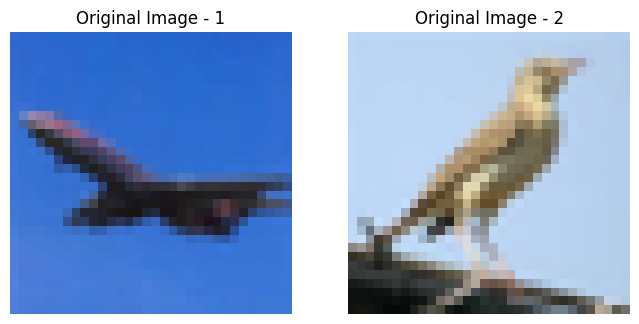

In [ ]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

(x_train, _), (_, _) = cifar10.load_data()

image1 = x_train[np.random.randint(0, len(x_train))]
image2 = x_train[np.random.randint(0, len(x_train))]


plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title('Original Image - 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.title('Original Image - 2')
plt.axis('off')

plt.show()



In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the MNIST dataset
(x_train, y_train), (_, _) = mnist.load_data()

# Replace 'digit' with the digit you're interested in (e.g., 3 for digit 3)
digit = 3

# Filter images with the specified digit
indices = np.where(y_train == digit)[0]

# Randomly select an index
random_index = np.random.choice(indices)


# --------------------------------------------------
plt.imshow(x_train[random_index], cmap='gray')
plt.axis('off')
# ------------------------------------------------
image = Image.fromarray(x_train[random_index])
# image = Image.open("/content/me1.jpeg")
crop_box = (5, 5, 23, 23)
cropped_image = image.crop(crop_box)

# Display the original and cropped images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cropped_image)
plt.title("Cropped Image")
plt.axis('off')

plt.show()
# -----------------------------------------

index1, index2 = np.random.choice(indices, 2, replace=False)

# Convert the image arrays to Pillow Images
image1 = Image.fromarray(x_train[index1])
image2 = Image.fromarray(x_train[index2])

# Perform addition on the images
result_image = Image.fromarray(np.add(np.array(image1), np.array(image2)))

# Display the original images and the result
plt.subplot(1, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title("Image 1")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image2, cmap='gray')
plt.title("Image 2")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(result_image, cmap='gray')
plt.title("Addition Result")
plt.axis('off')

plt.show()
# -----------------------------------------------

result_image = Image.fromarray(np.subtract(np.array(image1), np.array(image2)))

plt.subplot(1, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title("Image 1")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image2, cmap='gray')
plt.title("Image 2")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(result_image, cmap='gray')
plt.title("Subtraction Result")
plt.axis('off')

plt.show()

# ------------------------------------------------------

result_image = Image.fromarray(np.multiply(np.array(image1), np.array(image2)))

# ------------------------------------------------------
index1, index2 = np.random.choice(indices, 2, replace=False)

# Convert the image arrays to Pillow Images
image1 = Image.fromarray(x_train[index1])
image2 = Image.fromarray(x_train[index2])

# Ensure no division by zero
image2_array = np.array(image2)
image2_array[image2_array == 0] = 1  # Replace 0 with 1 to avoid division by zero

# Perform element-wise division on the images
result_image = Image.fromarray(np.divide(np.array(image1), image2_array).astype(np.uint8))

# ------------------------------------------------------------

alpha = 0.5

# Perform blending on the images
blended_array = (alpha * np.array(image1) + (1 - alpha) * np.array(image2)).astype(np.uint8)
blended_image = Image.fromarray(blended_array)


# ---------------------------------------------------------------

from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


def binarize_image(image, threshold=128):
    return np.where(image > threshold, 1, 0)


def display_images(images, titles):
    plt.figure(figsize=(12, 8))
    for i in range(len(images)):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()


(x_train, _), (_, _) = mnist.load_data()

index1, index2 = np.random.choice(len(x_train), 2, replace=False)

image1 = x_train[index1]
image2 = x_train[index2]

# Binarize images
binary_image1 = binarize_image(image1)
binary_image2 = binarize_image(image2)

# AND operation
and_result = np.logical_and(binary_image1, binary_image2).astype(np.uint8)

# OR operation
or_result = np.logical_or(binary_image1, binary_image2).astype(np.uint8)

# NOT operation
not_result1 = np.logical_not(binary_image1).astype(np.uint8)
not_result2 = np.logical_not(binary_image2).astype(np.uint8)

# XOR operation
xor_result = np.logical_xor(binary_image1, binary_image2).astype(np.uint8)

# Bitshift left operation
left_shift_result = np.left_shift(binary_image1, 1).astype(np.uint8)

# Bitshift right operation
right_shift_result = np.right_shift(binary_image1, 1).astype(np.uint8)

# Display results
display_images([binary_image1, binary_image2, and_result, or_result, not_result1, not_result2, xor_result, left_shift_result],
               ['Image 1', 'Image 2', 'AND', 'OR', 'NOT Image 1', 'NOT Image 2', 'XOR', 'Left Shift'])


# **Grayscale**

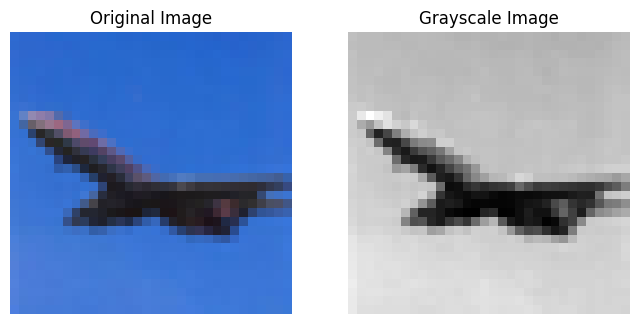

In [ ]:
def rgb_to_grayscale(image):
  height,width,channels = image.shape
  grayscaleImage = np.zeros((height,width))
  for x in range(height):
    for y in range(width):
        pixelValue = sum(image[x,y])/channels
        grayscaleImage[x,y] = pixelValue
  return grayscaleImage

grayImage1 = rgb_to_grayscale(image1)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(grayImage1,cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

# **Crop**

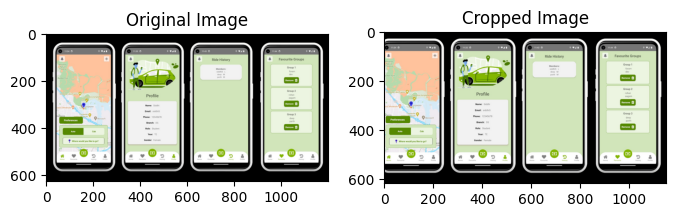

In [ ]:
def crop_image(image, x, y):
    height,width,_ = image.shape
    cropped_image = image[y:y+height, x:x+width]
    return cropped_image

croppedImage = crop_image(image1,50,10)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(croppedImage)
plt.title('Cropped Image')

plt.show()

# **Arithmetic Operations**

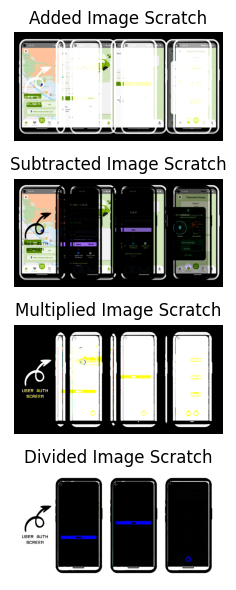

In [ ]:
def addImages(image1, image2):
    assert image1.shape == image2.shape, "Images must have the same size"
    height, width, channels = image1.shape
    addedImage = image1.copy()
    for y in range(height):
        for x in range(width):
            for c in range(channels):
                addedImage[y, x, c] = min(int(image1[y, x, c]) + int(image2[y, x, c]), 255)
    return addedImage

def subtractImages(image1, image2):
    assert image1.shape == image2.shape, "Images must have the same size"
    height, width, channels = image1.shape
    subtractedImage = image1.copy()
    for y in range(height):
        for x in range(width):
            for c in range(channels):
                subtractedImage[y, x, c] = max(int(image1[y, x, c]) - int(image2[y, x, c]), 0)
    return subtractedImage

def multiplyImages(image1, image2):
    assert image1.shape == image2.shape, "Images must have the same size"
    height, width, channels = image1.shape
    multipliedImage = image1.copy()
    for y in range(height):
        for x in range(width):
            for c in range(channels):
                multipliedImage[y, x, c] = min(int(image1[y, x, c]) * int(image2[y, x, c]), 255)
    return multipliedImage

def divideImages(image1, image2):
    assert image1.shape == image2.shape, "Images must have the same size"
    height, width, channels = image1.shape
    dividedImage = image1.copy()
    for y in range(height):
        for x in range(width):
            for c in range(channels):
                if int(image2[y, x, c]) != 0:
                    dividedImage[y, x, c] = min(int(image1[y, x, c]) / int(image2[y, x, c]), 255)
                else:
                    dividedImage[y, x, c] = 255  # Handle division by zero
    return dividedImage

addedImage = addImages(image1,image2)
subtractedImage = subtractImages(image1,image2)
multipliedImage = multiplyImages(image1,image2)
dividedImage = divideImages(image1,image2)

plt.figure(figsize=(6, 6))

plt.subplot(4, 2, 1)
plt.imshow(addedImage)
plt.title('Added Image Scratch')
plt.axis('off')


plt.subplot(4, 2, 3)
plt.imshow(subtractedImage)
plt.title('Subtracted Image Scratch')
plt.axis('off')


plt.subplot(4, 2, 5)
plt.imshow(multipliedImage)
plt.title('Multiplied Image Scratch')
plt.axis('off')


plt.subplot(4, 2, 7)
plt.imshow(dividedImage)
plt.title('Divided Image Scratch')
plt.axis('off')


plt.tight_layout()
plt.show()

# **blending**

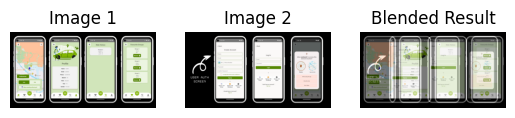

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def blend_images(image1, image2, alpha=0.5):

    image1_array = np.array(image1)
    image2_array = np.array(image2)

    # Perform blending
    blended_array = (alpha * image1_array + (1 - alpha) * image2_array).astype(np.uint8)
    blended_image = Image.fromarray(blended_array)

    return blended_image

blended_image = blend_images(image1, image2, alpha=0.5)
# Display the original images and the blended result
plt.subplot(1, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title("Image 1")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image2, cmap='gray')
plt.title("Image 2")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blended_image, cmap='gray')
plt.title("Blended Result")
plt.axis('off')

plt.show()




# **logical Operations**

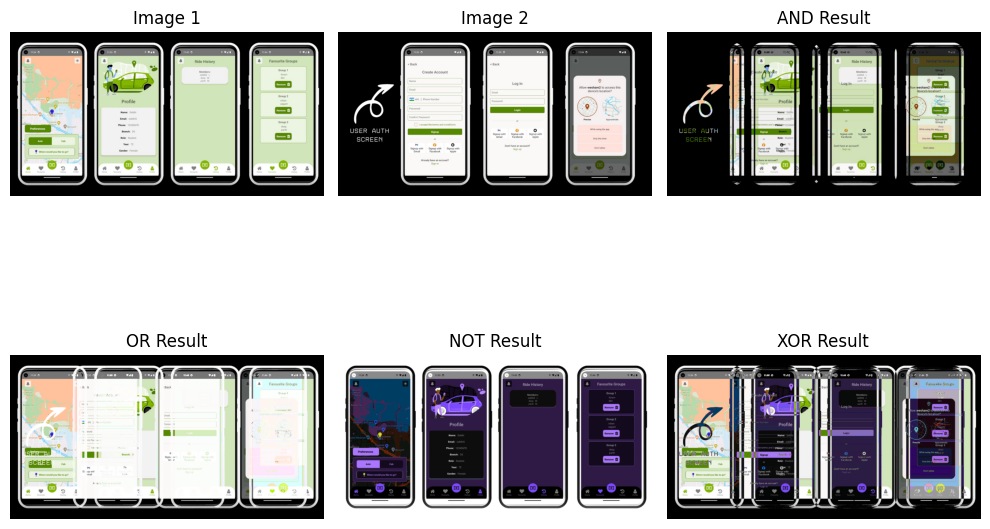

In [ ]:
def logical_and(image1, image2):
    height, width = len(image1), len(image1[0])
    result = [[0 for _ in range(width)] for _ in range(height)]
    for i in range(height):
        for j in range(width):
            result[i][j] = image1[i][j] & image2[i][j]
    return result

def logical_or(image1, image2):
    height, width = len(image1), len(image1[0])
    result = [[0 for _ in range(width)] for _ in range(height)]
    for i in range(height):
        for j in range(width):
            result[i][j] = image1[i][j] | image2[i][j]
    return result

def logical_not(image):
    height, width = len(image), len(image[0])
    result = [[0 for _ in range(width)] for _ in range(height)]
    for i in range(height):
        for j in range(width):
            result[i][j] = 255 - image[i][j]
    return result

def logical_xor(image1, image2):
    height, width = len(image1), len(image1[0])
    result = [[0 for _ in range(width)] for _ in range(height)]
    for i in range(height):
        for j in range(width):
            result[i][j] = image1[i][j] ^ image2[i][j]
    return result

and_result = np.array(logical_and(image1, image2))
or_result = np.array(logical_or(image1, image2))
not_result = np.array(logical_not(image1))
xor_result = np.array(logical_xor(image1, image2))

    # Plot the results
plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title("Image 1")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(image2, cmap='gray')
plt.title("Image 2")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(and_result, cmap='gray')
plt.title("AND Result")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(or_result, cmap='gray')
plt.title("OR Result")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(not_result, cmap='gray')
plt.title("NOT Result")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(xor_result, cmap='gray')
plt.title("XOR Result")
plt.axis('off')

plt.tight_layout()
plt.show()

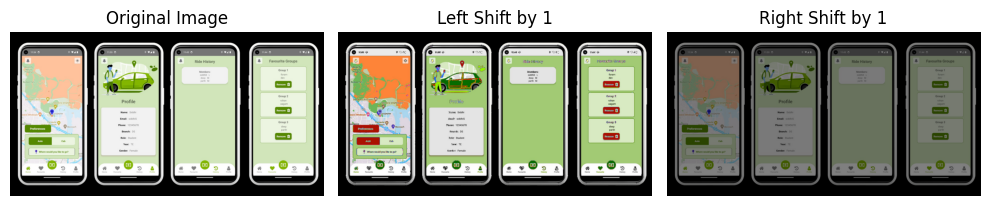

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def left_shift(image, shift):
    height, width = len(image), len(image[0])
    result = [[0 for _ in range(width)] for _ in range(height)]
    for i in range(height):
        for j in range(width):
            result[i][j] = (image[i][j] << shift) & 255  # Ensure result is within byte range
    return result

def right_shift(image, shift):
    height, width = len(image), len(image[0])
    result = [[0 for _ in range(width)] for _ in range(height)]
    for i in range(height):
        for j in range(width):
            result[i][j] = image[i][j] >> shift
    return result




left_shift_result = np.array(left_shift(image1, shift=1))
right_shift_result = np.array(right_shift(image1, shift=1))

    # Plot the results
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(left_shift_result, cmap='gray')
plt.title(f"Left Shift by 1")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(right_shift_result, cmap='gray')
plt.title(f"Right Shift by 1")
plt.axis('off')

plt.tight_layout()
plt.show()


# **negative ,thresholding,slicing with background ,slicing without background**

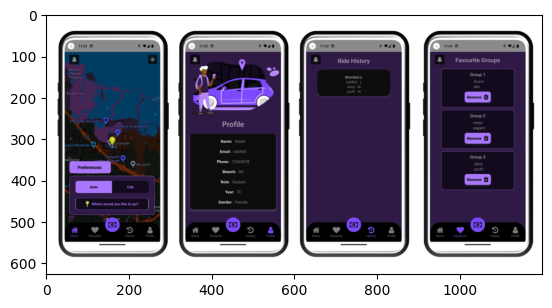

In [ ]:
def image_negative(images):
    return 255 - images

# img=cv2.imread('/content/img.jpeg',cv2.IMREAD_GRAYSCALE)
neg= image_negative(image1)

plt.imshow(neg)

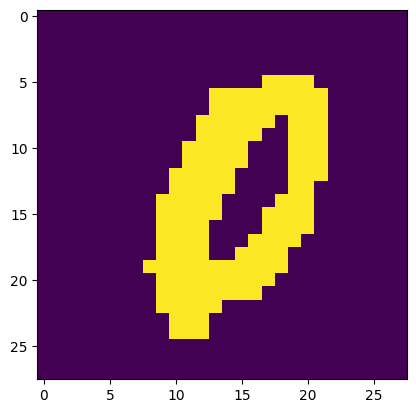

In [ ]:
def thresholding(img, threshold = 127):
  new_img = img.copy()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i][j] >= threshold:
        new_img[i][j] = 255
      else:
        new_img[i][j] = 0
  return new_img

threshold_img = thresholding(image1)

plt.imshow(threshold_img)

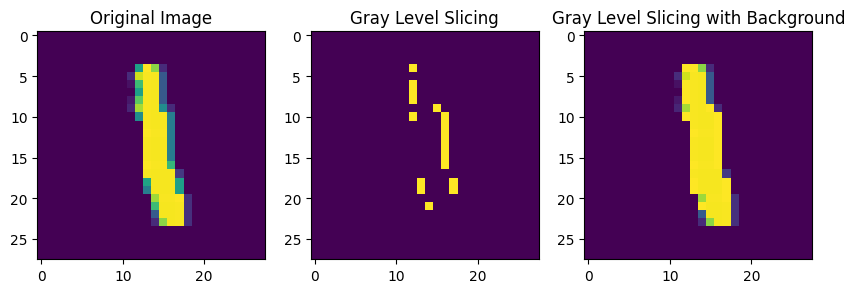

In [ ]:
def gray_level_slicing(img, min_intensity, max_intensity):
    new_img = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if min_intensity <= img[i][j] <= max_intensity:
                new_img[i][j] = 255
            else:
                new_img[i][j] = 0
    return new_img

def gray_level_slicing_with_bg(img, min_intensity, max_intensity):
    new_img = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if min_intensity <= img[i][j] <= max_intensity:
                new_img[i][j] = 255
            else:
                new_img[i][j] = img[i][j]
    return new_img

(train_X, train_y), (test_X, test_y) = mnist.load_data()
img = train_X[6]

min_intensity = 100
max_intensity = 200
sliced_img = gray_level_slicing(img, min_intensity, max_intensity)


sliced_img_with_bg = gray_level_slicing_with_bg(img, min_intensity, max_intensity)

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1), plt.imshow(img), plt.title("Original Image")
plt.subplot(1, 3, 2), plt.imshow(sliced_img), plt.title("Gray Level Slicing")
plt.subplot(1, 3, 3), plt.imshow(sliced_img_with_bg), plt.title("Gray Level Slicing with Background")

plt.show()

# **contrast stretching , log and power transformation**

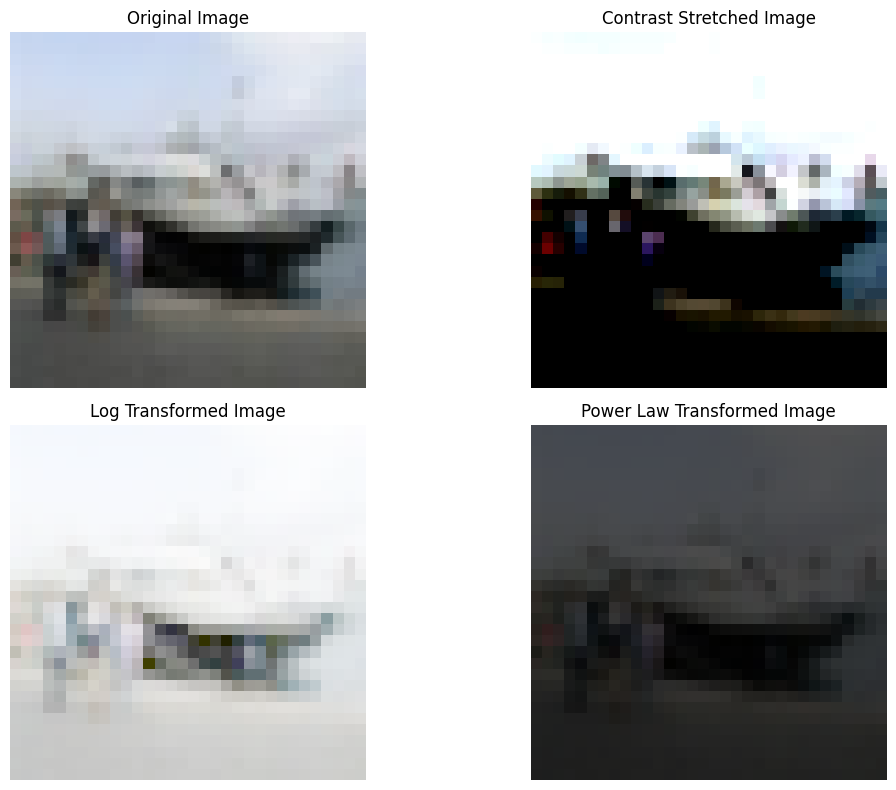

In [ ]:
def contrast_stretching(image,s1,s2,r1,r2):
    height,width, channels= image.shape
    output = image.copy()
    alpha = s1/r1
    beta = (s2 - s1)/(r2 - r1)
    gamma = (255 - s2)/(255 - r2)
    for i in range(height):
        for j in range(width):
            for c in range(channels):
                if image[i,j,c] < r1:
                    output[i,j,c] = alpha*image[i,j,c]
                elif image[i,j,c] >= r1 and image[i,j,c] < r2:
                    output[i,j,c] = beta*(image[i,j,c] - r1) + s1
                else:
                    output[i,j,c] = gamma*(image[i,j,c] - r2) + s2
    return output


def log_transformation(img):
    c = 255 / np.log(1 + np.max(img))
    log_transformed_img = c * np.log(1 + img)
    return log_transformed_img.astype(np.uint8)

def power_law_transformation(img, gamma):
    c = 1
    power_law_transformed_img = c * np.power(img, gamma)
    return power_law_transformed_img.astype(np.uint8)

# Apply contrast stretching
r1, s1, r2, s2 = 100, 0, 200, 255
img=image1
stretched_img = contrast_stretching(img,s1, s2,r1, r2)

# Apply log transformation
log_transformed_img = log_transformation(img)

# Apply power law transformation
gamma = 0.8
power_law_transformed_img = power_law_transformation(img, gamma)

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(stretched_img, cmap='gray')
plt.title('Contrast Stretched Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(log_transformed_img, cmap='gray')
plt.title('Log Transformed Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(power_law_transformed_img, cmap='gray')
plt.title('Power Law Transformed Image')
plt.axis('off')

plt.tight_layout()
plt.show()


# **Histogram Equalisation & stretching**

4422102/4422102 [==============================] - 0s 0us/step


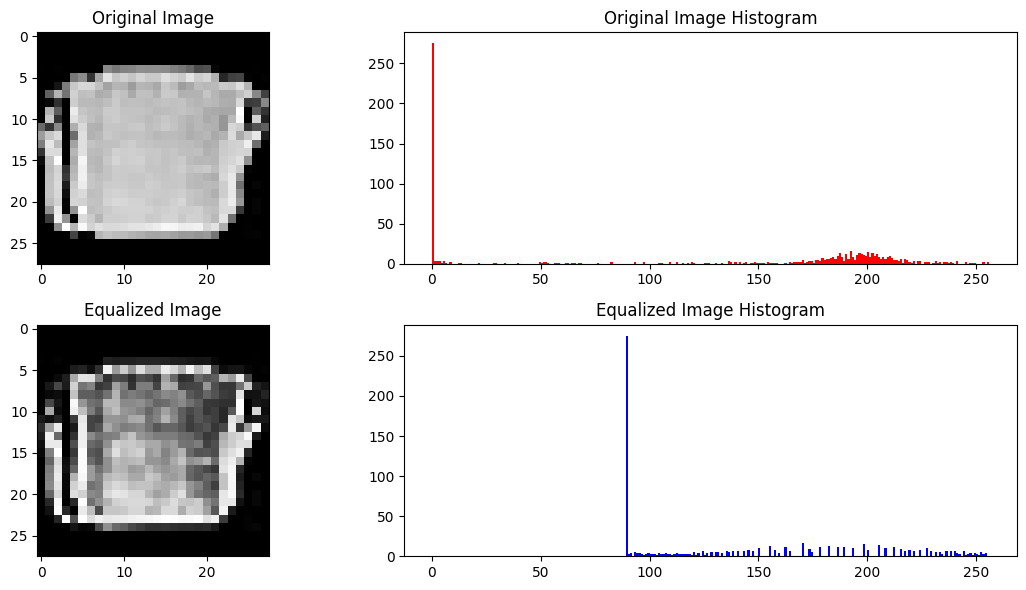

Histogram equalization tends to increase the contrast of the image by spreading out the intensity values.


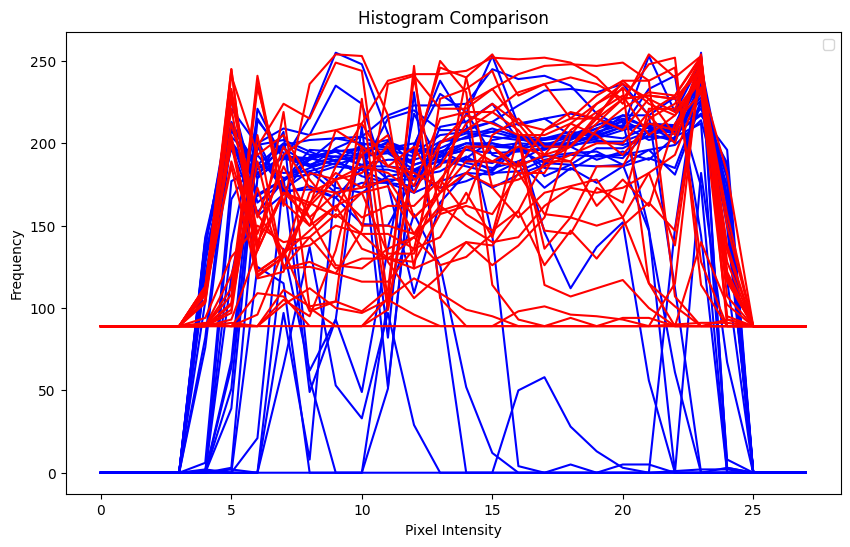

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# Load Fashion MNIST dataset
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()
image = train_X[np.random.randint(0, len(train_X))]  # Selecting a random image

# Step 2: Calculate histogram
hist, bins = np.histogram(image.flatten(), bins=256, range=[0,256])

# Step 3: Calculate PMF
pmf = hist / np.sum(hist)

# Step 4: Calculate CDF
cdf = np.cumsum(pmf)

# Step 5: Find new gray values using CDF
new_gray_values = np.floor(cdf * 255).astype('uint8')

# Step 6: Convert image using new gray values
equalized_image = new_gray_values[image]

# Step 7: Show the difference in histograms
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(2, 2, 2)
plt.hist(image.flatten(), bins=256, range=[0,256], color='r')
plt.title('Original Image Histogram')
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.subplot(2, 2, 4)
plt.hist(equalized_image.flatten(), bins=256, range=[0,256], color='b')
plt.title('Equalized Image Histogram')
plt.tight_layout()
plt.show()

# Step 8: Conclusion
print("Histogram equalization tends to increase the contrast of the image by spreading out the intensity values.")



plt.figure(figsize=(10, 6))
plt.plot(image, color='blue')
plt.plot(equalized_image, color='red' )
plt.title('Histogram Comparison')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()


<Axes: ylabel='Count'>

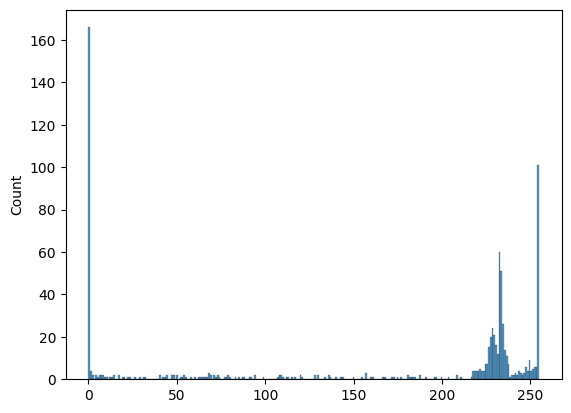

In [ ]:
import seaborn as sns
def hist_equalization(image):
  hist, bins = np.histogram(image.flatten(), bins=256, range=[0,256])
  cdf=hist.cumsum()
  normalized_cdf=(cdf-cdf.min())*255/(cdf.max()-cdf.min())
  equalized_image=np.interp(image.flatten(), bins[:-1],normalized_cdf).reshape(image.shape)
  return equalized_image
sns.histplot(image.flatten(),bins=256)


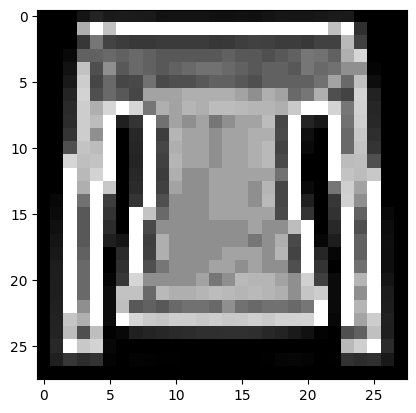

In [ ]:
eq_image=hist_equalization(image)
plt.imshow(eq_image,cmap='gray')

<Axes: ylabel='Count'>

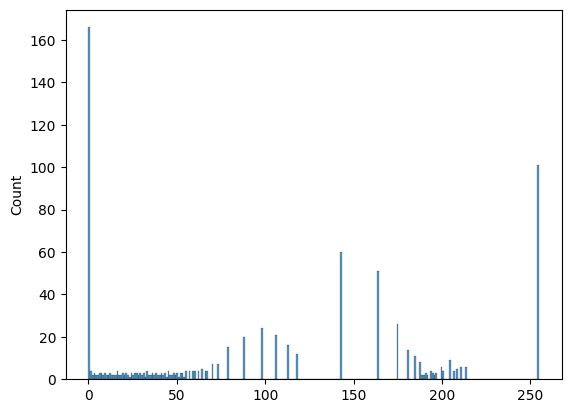

In [ ]:
sns.histplot(eq_image.flatten(),bins=256)

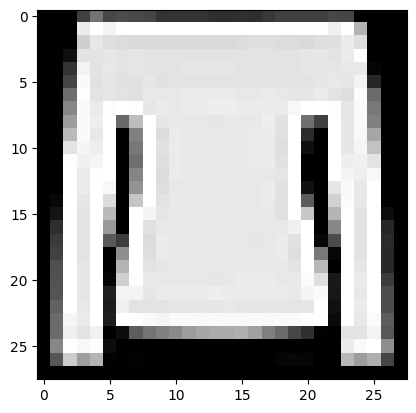

In [ ]:
def histogram_stretching(image, r_min, r_max):
    min_pixel = np.min(image)
    max_pixel = np.max(image)

    stretched_image = (image - min_pixel) * ((r_max - r_min) / (max_pixel - min_pixel)) + r_min
    stretched_image = np.clip(stretched_image, 0, 255)

    return stretched_image.astype(np.uint8)
stretch_img=histogram_stretching(image,0,100)
plt.imshow(stretch_img, cmap='gray')

<Axes: ylabel='Count'>

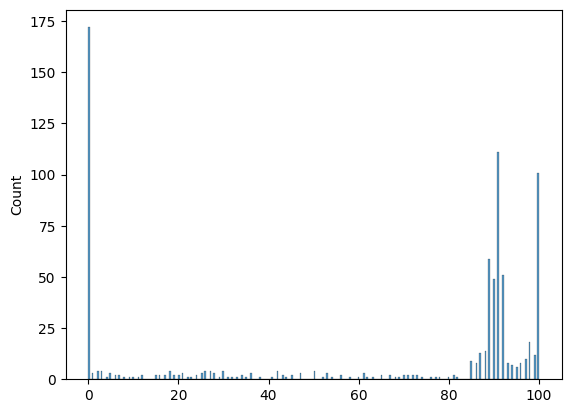

In [ ]:
sns.histplot(stretch_img.flatten(), bins=256)

# **Gaussian Noise,Averaging Filter Salt & Pepper Noise,Median Filter**

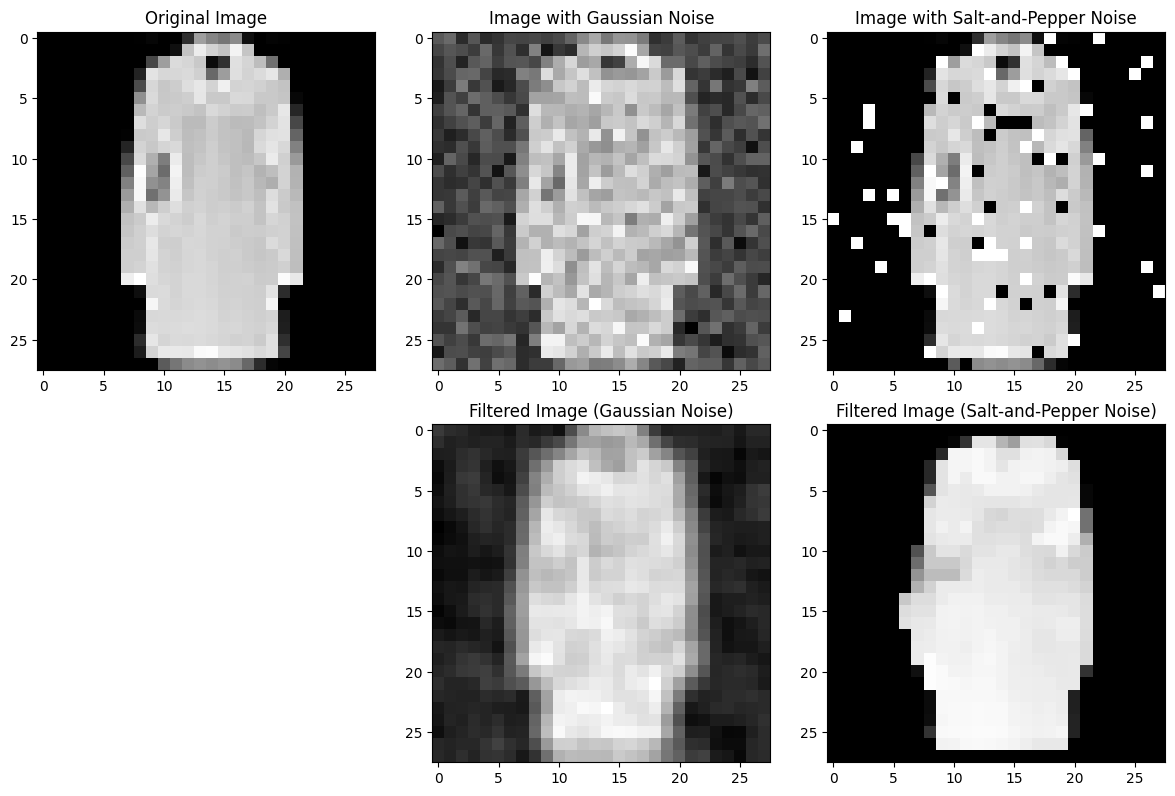

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# Load Fashion MNIST dataset
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()
image = train_X[np.random.randint(0, len(train_X))]  # Selecting a random image

# image = cv2.imread("/content/img.jpeg",cv2.IMREAD_GRAYSCALE)
# plt.imshow(img)

# Add Gaussian noise

def add_gaussian_noise(image,mean,std):
    gau = np.random.normal(mean,std,image.shape)
    image = image+gau
    return image
image_with_gaussian_noise =add_gaussian_noise(image,20,40)
# Add salt-and-pepper noise
def add_salt_and_pepper_noise(img):
    row, col = img.shape
    noisy_img = img.copy()
    number_of_pixels = np.random.randint(30, 100)
    for _ in range(number_of_pixels):
        y_coord = np.random.randint(0, row)
        x_coord = np.random.randint(0, col)
        noisy_img[y_coord, x_coord] = 255  # White pixel

    number_of_pixels = np.random.randint(30, 100)
    for _ in range(number_of_pixels):
        y_coord = np.random.randint(0, row)
        x_coord = np.random.randint(0, col)
        noisy_img[y_coord, x_coord] = 0  # Black pixel

    return noisy_img

image_with_salt_and_pepper_noise = add_salt_and_pepper_noise(image)

# Define median filter for noise removal
def median_filter(img):
    img_noisy = img.copy()
    m, n = img_noisy.shape
    img_new = np.zeros([m, n])
    for i in range(1, m - 1):
        for j in range(1, n - 1):
            temp = [img_noisy[i - 1, j - 1], img_noisy[i - 1, j], img_noisy[i - 1, j + 1],
                    img_noisy[i, j - 1], img_noisy[i, j], img_noisy[i, j + 1],
                    img_noisy[i + 1, j - 1], img_noisy[i + 1, j], img_noisy[i + 1, j + 1]]
            temp = sorted(temp)
            img_new[i, j] = temp[4]
    return img_new

def average_filter(img):
    img_noisy = img.copy()
    m, n = img_noisy.shape
    img_new = np.zeros([m, n])
    for i in range(m):
        for j in range(n):
            img_new[i, j] = np.mean(img_noisy[max(i-1, 0):min(i+2, m), max(j-1, 0):min(j+2, n)])
    return img_new


# Apply median filter to remove salt-and-pepper noise
image_with_gaussian_noise_filtered = average_filter(image_with_gaussian_noise)
image_with_salt_and_pepper_noise_filtered = median_filter(image_with_salt_and_pepper_noise)

# Plot original and noisy images
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(image_with_gaussian_noise, cmap='gray')
plt.title('Image with Gaussian Noise')

plt.subplot(2, 3, 3)
plt.imshow(image_with_salt_and_pepper_noise, cmap='gray')
plt.title('Image with Salt-and-Pepper Noise')

# Plot filtered images
plt.subplot(2, 3, 5)
plt.imshow(image_with_gaussian_noise_filtered, cmap='gray')
plt.title('Filtered Image (Gaussian Noise)')

plt.subplot(2, 3, 6)
plt.imshow(image_with_salt_and_pepper_noise_filtered, cmap='gray')
plt.title('Filtered Image (Salt-and-Pepper Noise)')

plt.tight_layout()
plt.show()


# **High Pass Filter and High Boost Filter**

4422102/4422102 [==============================] - 0s 0us/step


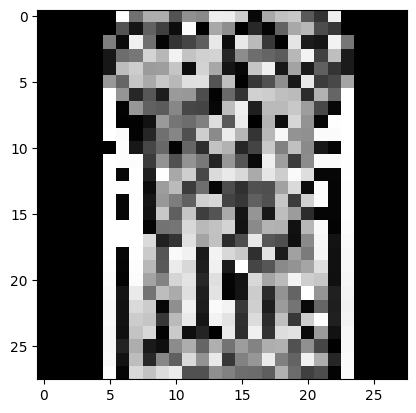

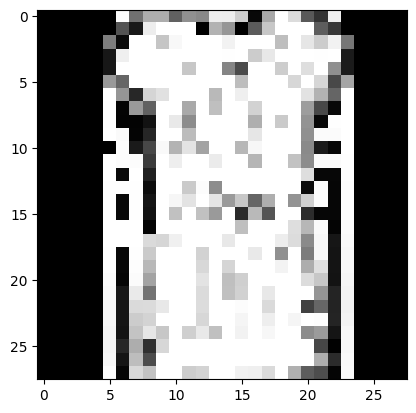

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# Load Fashion MNIST dataset
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()
img = train_X[np.random.randint(0, len(train_X))]  # Selecting a random image

def high_pass_filter(image):
    kernel = np.array([[-1, -1, -1],
                       [-1,  8, -1],
                       [-1, -1, -1]])
    rows, cols = image.shape
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant')
    filtered_image = np.zeros_like(padded_image)
    for i in range(rows):
        for j in range(cols):
            filtered_image[i+1, j+1] = np.sum(kernel * padded_image[i:i+3, j:j+3])
    return filtered_image[1:-1, 1:-1].astype(np.uint8)

img_new = high_pass_filter(img)
plt.imshow(img_new, cmap="gray")
plt.show()

def high_boost_filter(image, boost_factor=1.0):
    kernel = np.array([[-1, -1, -1],
                       [-1,  8, -1],
                       [-1, -1, -1]])
    rows, cols = image.shape
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant')
    filtered_image = np.zeros_like(padded_image)
    for i in range(rows):
        for j in range(cols):
            filtered_image[i+1, j+1] = np.sum(kernel * padded_image[i:i+3, j:j+3])
    result_image = image + boost_factor * filtered_image[1:-1, 1:-1]
    result_image = np.clip(result_image, 0, 255).astype(np.uint8)
    return result_image

img_new = high_boost_filter(img)
plt.imshow(img_new, cmap="gray")
plt.show()


# **Opening and Closing**

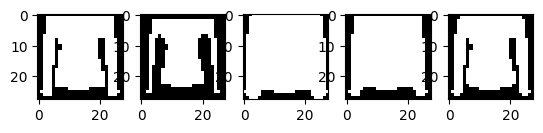

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load MNIST dataset
(_, _), (x_test, _) = mnist.load_data()

# Sample image from MNIST dataset
image = x_test[0]

def erosion(image,mask):
    eroded_image=np.zeros_like(image)
    row_pad=mask.shape[0]//2
    col_pad=mask.shape[1]//2
    padded_image=np.pad(image,((row_pad,row_pad),(col_pad,col_pad)))
    kernel_mask=(mask==1)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            sub_array = padded_image[i:i + mask.shape[0], j:j + mask.shape[1]]
            if np.all(sub_array[kernel_mask]):
                eroded_image[i, j] = 1
    return eroded_image



def dilation(image, mask):
  row_pad = mask.shape[0]//2
  col_pad = mask.shape[1]//2
  dilated_img = np.zeros(image.shape)
  padded_img = np.pad(image, ((row_pad, row_pad), (col_pad, col_pad)))
  kernel = (mask==1)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      sub_array = padded_img[i:i+mask.shape[0], j:j+mask.shape[1]]
      if(np.any(sub_array[kernel])):
        dilated_img[i,j] = 1
  return dilated_img



def opening(image,mask):
    return dilation(erosion(image,mask),mask)

def closing(image, mask):
  return erosion(dilation(image, mask), mask)


figure, axis = plt.subplots(1,5)

binary_image = np.where(image>128, 1,0)

eroded_img = erosion(binary_image, np.array([[0,1,0],[1,1,1],[0,1,0]]))
axis[1].imshow(eroded_img, cmap='gray')
dilated_img = dilation(binary_image,  np.array([[0,1,0],[1,1,1],[0,1,0]]))
axis[2].imshow(dilated_img, cmap='gray')
close=closing(binary_image, np.array([[0,1,0],[1,1,1],[0,1,0]]))
axis[3].imshow(close, cmap='gray')
open = opening(binary_image, np.array([[0,1,0],[1,1,1],[0,1,0]]))
axis[4].imshow(open, cmap='gray')
axis[0].imshow(binary_image, cmap='gray')
plt.show()

# **Fourier Transform Image**

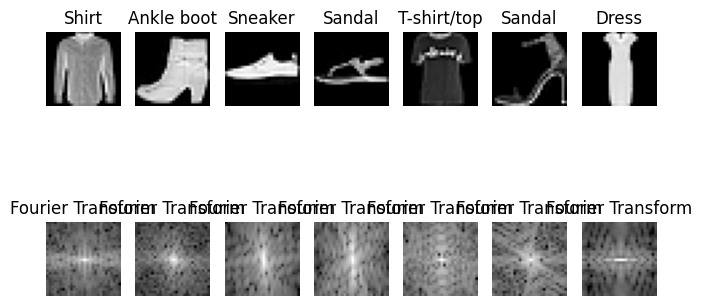

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Display random images from the dataset
num_images_to_display = 7
random_indices = np.random.randint(0, len(train_images), num_images_to_display)

for i, idx in enumerate(random_indices):
    # Original Image
    plt.subplot(2, num_images_to_display, i+1)
    plt.imshow(train_images[idx], cmap='gray')
    plt.title(class_labels[train_labels[idx]])
    plt.axis('off')

    # Perform Fourier Transform
    f_transform = np.fft.fft2(train_images[idx])
    f_transform_shifted = np.fft.fftshift(f_transform)
    magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)  # Log scaling for better visualization

    # Fourier Transform Image
    plt.subplot(2, num_images_to_display, num_images_to_display+i+1)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Fourier Transform')
    plt.axis('off')

plt.tight_layout()
plt.show()

# **ideal low-pass filter**

11490434/11490434 [==============================] - 0s 0us/step


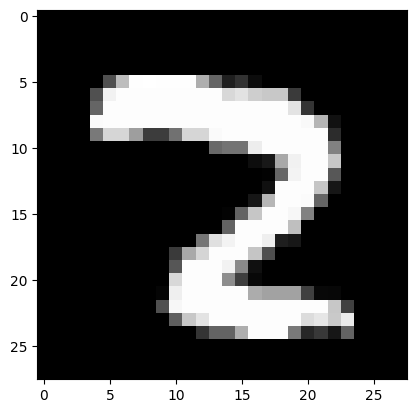

In [ ]:
import matplotlib.image as myimg
import matplotlib.pyplot as plt
from keras.datasets import mnist
import math
import numpy as np

(x_train,y_train),(_,_)=mnist.load_data()


image=x_train[28]

#multiply by (-1)^(x+y)
def center_img(image):
    new_image=np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i,j]=math.pow(-1,(i+j))*image[i,j]
    return new_image
def ideal_lp_filter(image,t):
    s1=center_img(image)
    s2=fft(s1)
    huv=np.zeros(s2.shape)
    for i in range(s2.shape[0]):
        for j in range(s2.shape[1]):
            huv[i,j]=(math.sqrt(math.pow((i-(s2.shape[0]/2)),2)+math.pow((j-(s2.shape[1]/2)),2))<=t)
    s3=s2*huv
    s4=invfft(s3)
    s5=np.array([elem.real for elem in invfft(s3)]).reshape(s4.shape)
    s6=center_img(s5)
    return s6
def fft(image):
  return np.fft.fft2(image)
def invfft(image):
    return np.fft.ifft2(image)
lp_image = ideal_lp_filter(image,60)
plt.imshow(lp_image, cmap='gray')

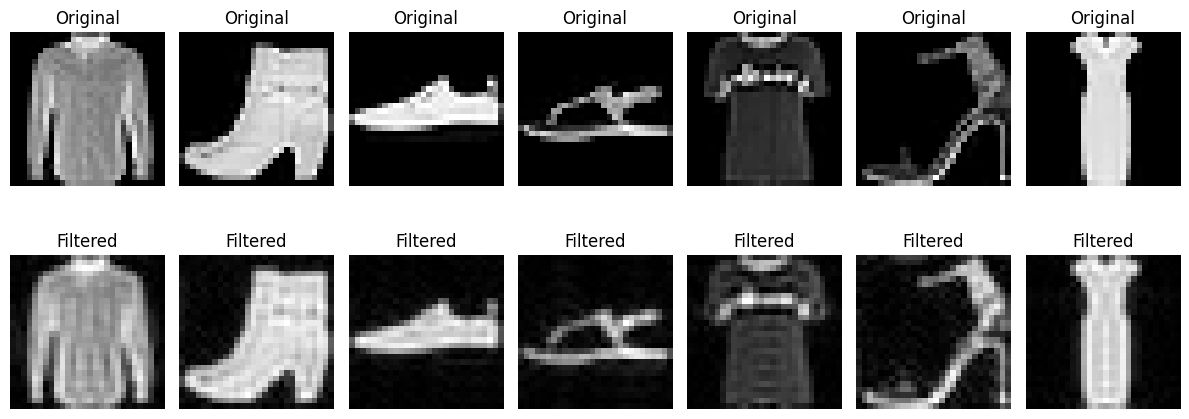

In [ ]:
# Define cutoff frequency for ideal low-pass filter
cutoff_frequency = 10

plt.figure(figsize=(12, 5))

for i, idx in enumerate(random_indices):
    # Original Image
    original_image = train_images[idx]

    # Perform Fourier Transform
    f_transform = np.fft.fft2(original_image)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Get image dimensions
    rows, cols = original_image.shape
    center_row, center_col = rows // 2, cols // 2

    # Create a meshgrid of frequencies
    u, v = np.meshgrid(np.arange(-center_col, cols - center_col), np.arange(-center_row, rows - center_row))

    # Compute distance from the center for each frequency
    dist_from_center = np.sqrt(u**2 + v**2)

    # Create the ideal low-pass filter mask
    ideal_lp_mask = np.zeros((rows, cols), dtype=np.uint8)
    ideal_lp_mask[dist_from_center <= cutoff_frequency] = 1

    # Apply the filter by element-wise multiplication in the frequency domain
    f_transform_filtered = f_transform_shifted * ideal_lp_mask

    # Perform Inverse Fourier Transform to obtain the filtered image
    filtered_image = np.fft.ifft2(np.fft.ifftshift(f_transform_filtered))
    filtered_image = np.abs(filtered_image)

    # Plot original image
    plt.subplot(2, num_images_to_display, i+1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Plot filtered image
    plt.subplot(2, num_images_to_display, num_images_to_display+i+1)
    plt.imshow(filtered_image, cmap='gray')
    plt.title('Filtered')
    plt.axis('off')

plt.tight_layout()
plt.show()

# **ideal high-pass filter**

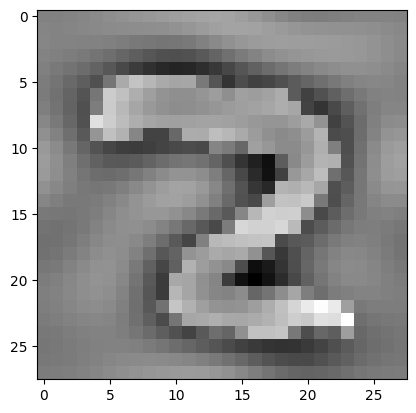

In [ ]:
def ideal_hp_filter(image,t):
    s1=center_img(image)
    s2=fft(s1)
    huv=np.zeros(s2.shape)
    for i in range(s2.shape[0]):
        for j in range(s2.shape[1]):
            huv[i,j]=(math.sqrt(math.pow((i-(s2.shape[0]/2)),2)+math.pow((j-(s2.shape[1]/2)),2))>t)
    s3=s2*huv
    s4=invfft(s3)
    s5=np.array([elem.real for elem in invfft(s3)]).reshape(s4.shape)
    s6=center_img(s5)
    return s6

#multiply by (-1)^(x+y)
def center_img(image):
    new_image=np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i,j]=math.pow(-1,(i+j))*image[i,j]
    return new_image
def fft(image):
  return np.fft.fft2(image)
def invfft(image):
    return np.fft.ifft2(image)

hp_image = ideal_hp_filter(image,3)
plt.imshow(hp_image, cmap='gray')

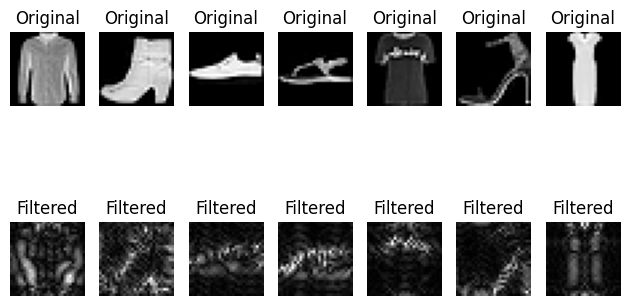

In [ ]:
#ideal high pass filter
# Define cutoff frequency for the ideal high-pass filter
cutoff_frequency = 10

for i, idx in enumerate(random_indices):
    # Load the image
    image = train_images[idx]

    # Perform Fourier Transform
    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Get image dimensions
    rows, cols = image.shape
    center_row, center_col = rows // 2, cols // 2

    # Create a meshgrid of frequencies
    u, v = np.meshgrid(np.arange(-center_col, cols - center_col), np.arange(-center_row, rows - center_row))

    # Compute distance from the center for each frequency
    dist_from_center = np.sqrt(u**2 + v**2)

    # Create the ideal high-pass filter mask
    ideal_hp_mask = np.zeros((rows, cols), dtype=np.uint8)
    ideal_hp_mask[dist_from_center > cutoff_frequency] = 1

    # Apply the filter by element-wise multiplication in the frequency domain
    f_transform_filtered = f_transform_shifted * ideal_hp_mask

    # Take inverse Fourier Transform to obtain the filtered image in spatial domain
    filtered_image = np.fft.ifft2(np.fft.ifftshift(f_transform_filtered))
    filtered_image = np.abs(filtered_image)

    # Plot original image
    plt.subplot(2, num_images_to_display, i+1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Plot filtered image
    plt.subplot(2, num_images_to_display, num_images_to_display+i+1)
    plt.imshow(filtered_image, cmap='gray')
    plt.title('Filtered')
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Gaussian low pass filter**

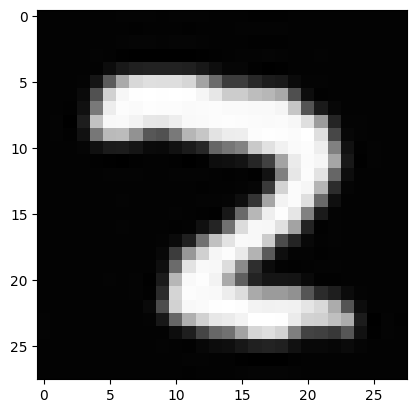

In [ ]:
def gaussian_lp_filter(image,t):
    s1=center_img(image)
    s2=fft(s1)
    huv=np.zeros(s2.shape)
    for i in range(s2.shape[0]):
        for j in range(s2.shape[1]):
            huv[i,j]=np.exp(-2*(math.pow((i-(s2.shape[0]/2)),2)+math.pow((j-(s2.shape[1]/2)),2))/(math.pow(t,2)))


    s3=s2*huv
    s4=invfft(s3)
    s5=np.array([elem.real for elem in invfft(s3)]).reshape(s4.shape)
    s6=center_img(s5)
    return s6

#multiply by (-1)^(x+y)
def center_img(image):
    new_image=np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i,j]=math.pow(-1,(i+j))*image[i,j]
    return new_image
def fft(image):
  return np.fft.fft2(image)
def invfft(image):
    return np.fft.ifft2(image)

lp_gimage = gaussian_lp_filter(image,20)
plt.imshow(lp_gimage, cmap='gray')

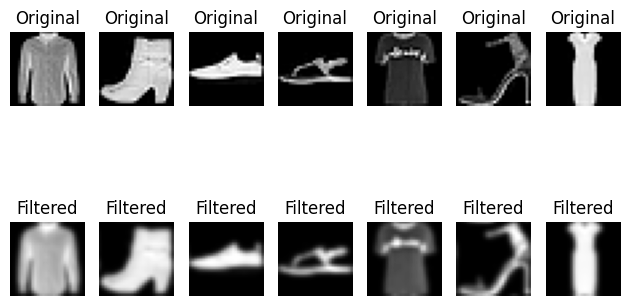

In [ ]:
#Gaussian low pass filter
# Define sigma for Gaussian filter
sigma = 5

for i, idx in enumerate(random_indices):
    # Load the image
    image = train_images[idx]

    # Perform Fourier Transform
    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Get image dimensions
    rows, cols = image.shape

    # Create Gaussian filter mask
    center_row, center_col = rows // 2, cols // 2
    u, v = np.meshgrid(np.arange(-center_col, cols - center_col), np.arange(-center_row, rows - center_row))
    gaussian_mask = np.exp(-(u**2 + v**2) / (2 * sigma**2))
    gaussian_mask /= np.sum(gaussian_mask)

    # Apply the filter by element-wise multiplication in the frequency domain
    f_transform_filtered = f_transform_shifted * gaussian_mask

    # Take inverse Fourier Transform to obtain the filtered image in spatial domain
    filtered_image = np.fft.ifft2(np.fft.ifftshift(f_transform_filtered))
    filtered_image = np.abs(filtered_image)

    # Plot original image
    plt.subplot(2, num_images_to_display, i+1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Plot filtered image
    plt.subplot(2, num_images_to_display, num_images_to_display+i+1)
    plt.imshow(filtered_image, cmap='gray')
    plt.title('Filtered')
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Gaussian high pass filter**

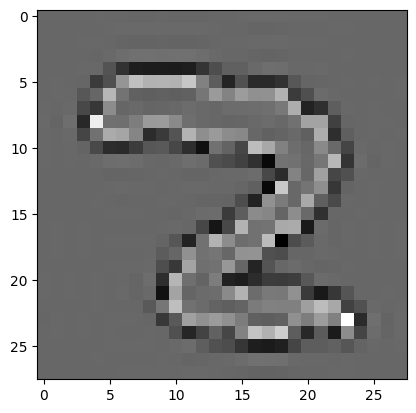

In [ ]:
def gaussian_hp_filter(image,t):
    s1=center_img(image)
    s2=fft(s1)
    huv=np.zeros(s2.shape)
    for i in range(s2.shape[0]):
        for j in range(s2.shape[1]):
            huv[i,j]=1-(np.exp(-2*(math.pow((i-(s2.shape[0]/2)),2)+math.pow((j-(s2.shape[1]/2)),2))/(math.pow(t,2))))


    s3=s2*huv
    s4=invfft(s3)
    s5=np.array([elem.real for elem in invfft(s3)]).reshape(s4.shape)
    s6=center_img(s5)
    return s6

#multiply by (-1)^(x+y)
def center_img(image):
    new_image=np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i,j]=math.pow(-1,(i+j))*image[i,j]
    return new_image
def fft(image):
  return np.fft.fft2(image)
def invfft(image):
    return np.fft.ifft2(image)

hp_gimage = gaussian_hp_filter(image,20)
plt.imshow(hp_gimage, cmap='gray')

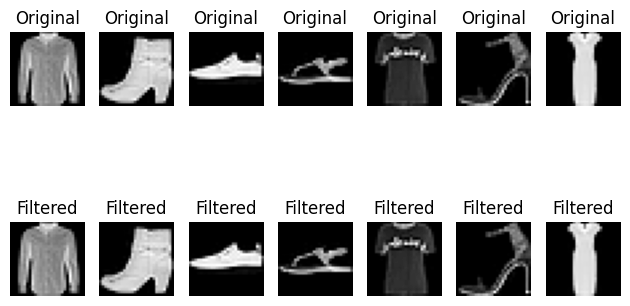

In [ ]:
##Gaussian high pass filter

# Define sigma for Gaussian filter
sigma = 5

for i, idx in enumerate(random_indices):
    # Load the image
    image = train_images[idx]

    # Perform Fourier Transform
    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Get image dimensions
    rows, cols = image.shape

    # Create Gaussian filter mask
    center_row, center_col = rows // 2, cols // 2
    u, v = np.meshgrid(np.arange(-center_col, cols - center_col), np.arange(-center_row, rows - center_row))
    gaussian_mask = np.exp(-(u**2 + v**2) / (2 * sigma**2))
    gaussian_mask /= np.sum(gaussian_mask)

    # Create high-pass filter mask by subtracting Gaussian filter mask from 1
    highpass_mask = 1 - gaussian_mask

    # Apply the filter by element-wise multiplication in the frequency domain
    f_transform_filtered = f_transform_shifted * highpass_mask

    # Take inverse Fourier Transform to obtain the filtered image in spatial domain
    filtered_image = np.fft.ifft2(np.fft.ifftshift(f_transform_filtered))
    filtered_image = np.abs(filtered_image)

    # Plot original image
    plt.subplot(2, num_images_to_display, i+1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Plot filtered image
    plt.subplot(2, num_images_to_display, num_images_to_display+i+1)
    plt.imshow(filtered_image, cmap='gray')
    plt.title('Filtered')
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Region Growing , Region Split , Region Merge**

<ipython-input-51-cf94ff183ae6>:49: RuntimeWarning: overflow encountered in scalar subtract
  if x < height - 1 and abs(image[x, y] - image[x+1, y]) < threshold:
<ipython-input-51-cf94ff183ae6>:53: RuntimeWarning: overflow encountered in scalar subtract
  if y < width - 1 and abs(image[x, y] - image[x, y+1]) < threshold:
<ipython-input-51-cf94ff183ae6>:51: RuntimeWarning: overflow encountered in scalar subtract
  if y > 0 and abs(image[x, y] - image[x, y-1]) < threshold:
<ipython-input-51-cf94ff183ae6>:47: RuntimeWarning: overflow encountered in scalar subtract
  if x > 0 and abs(image[x, y] - image[x-1, y]) < threshold:


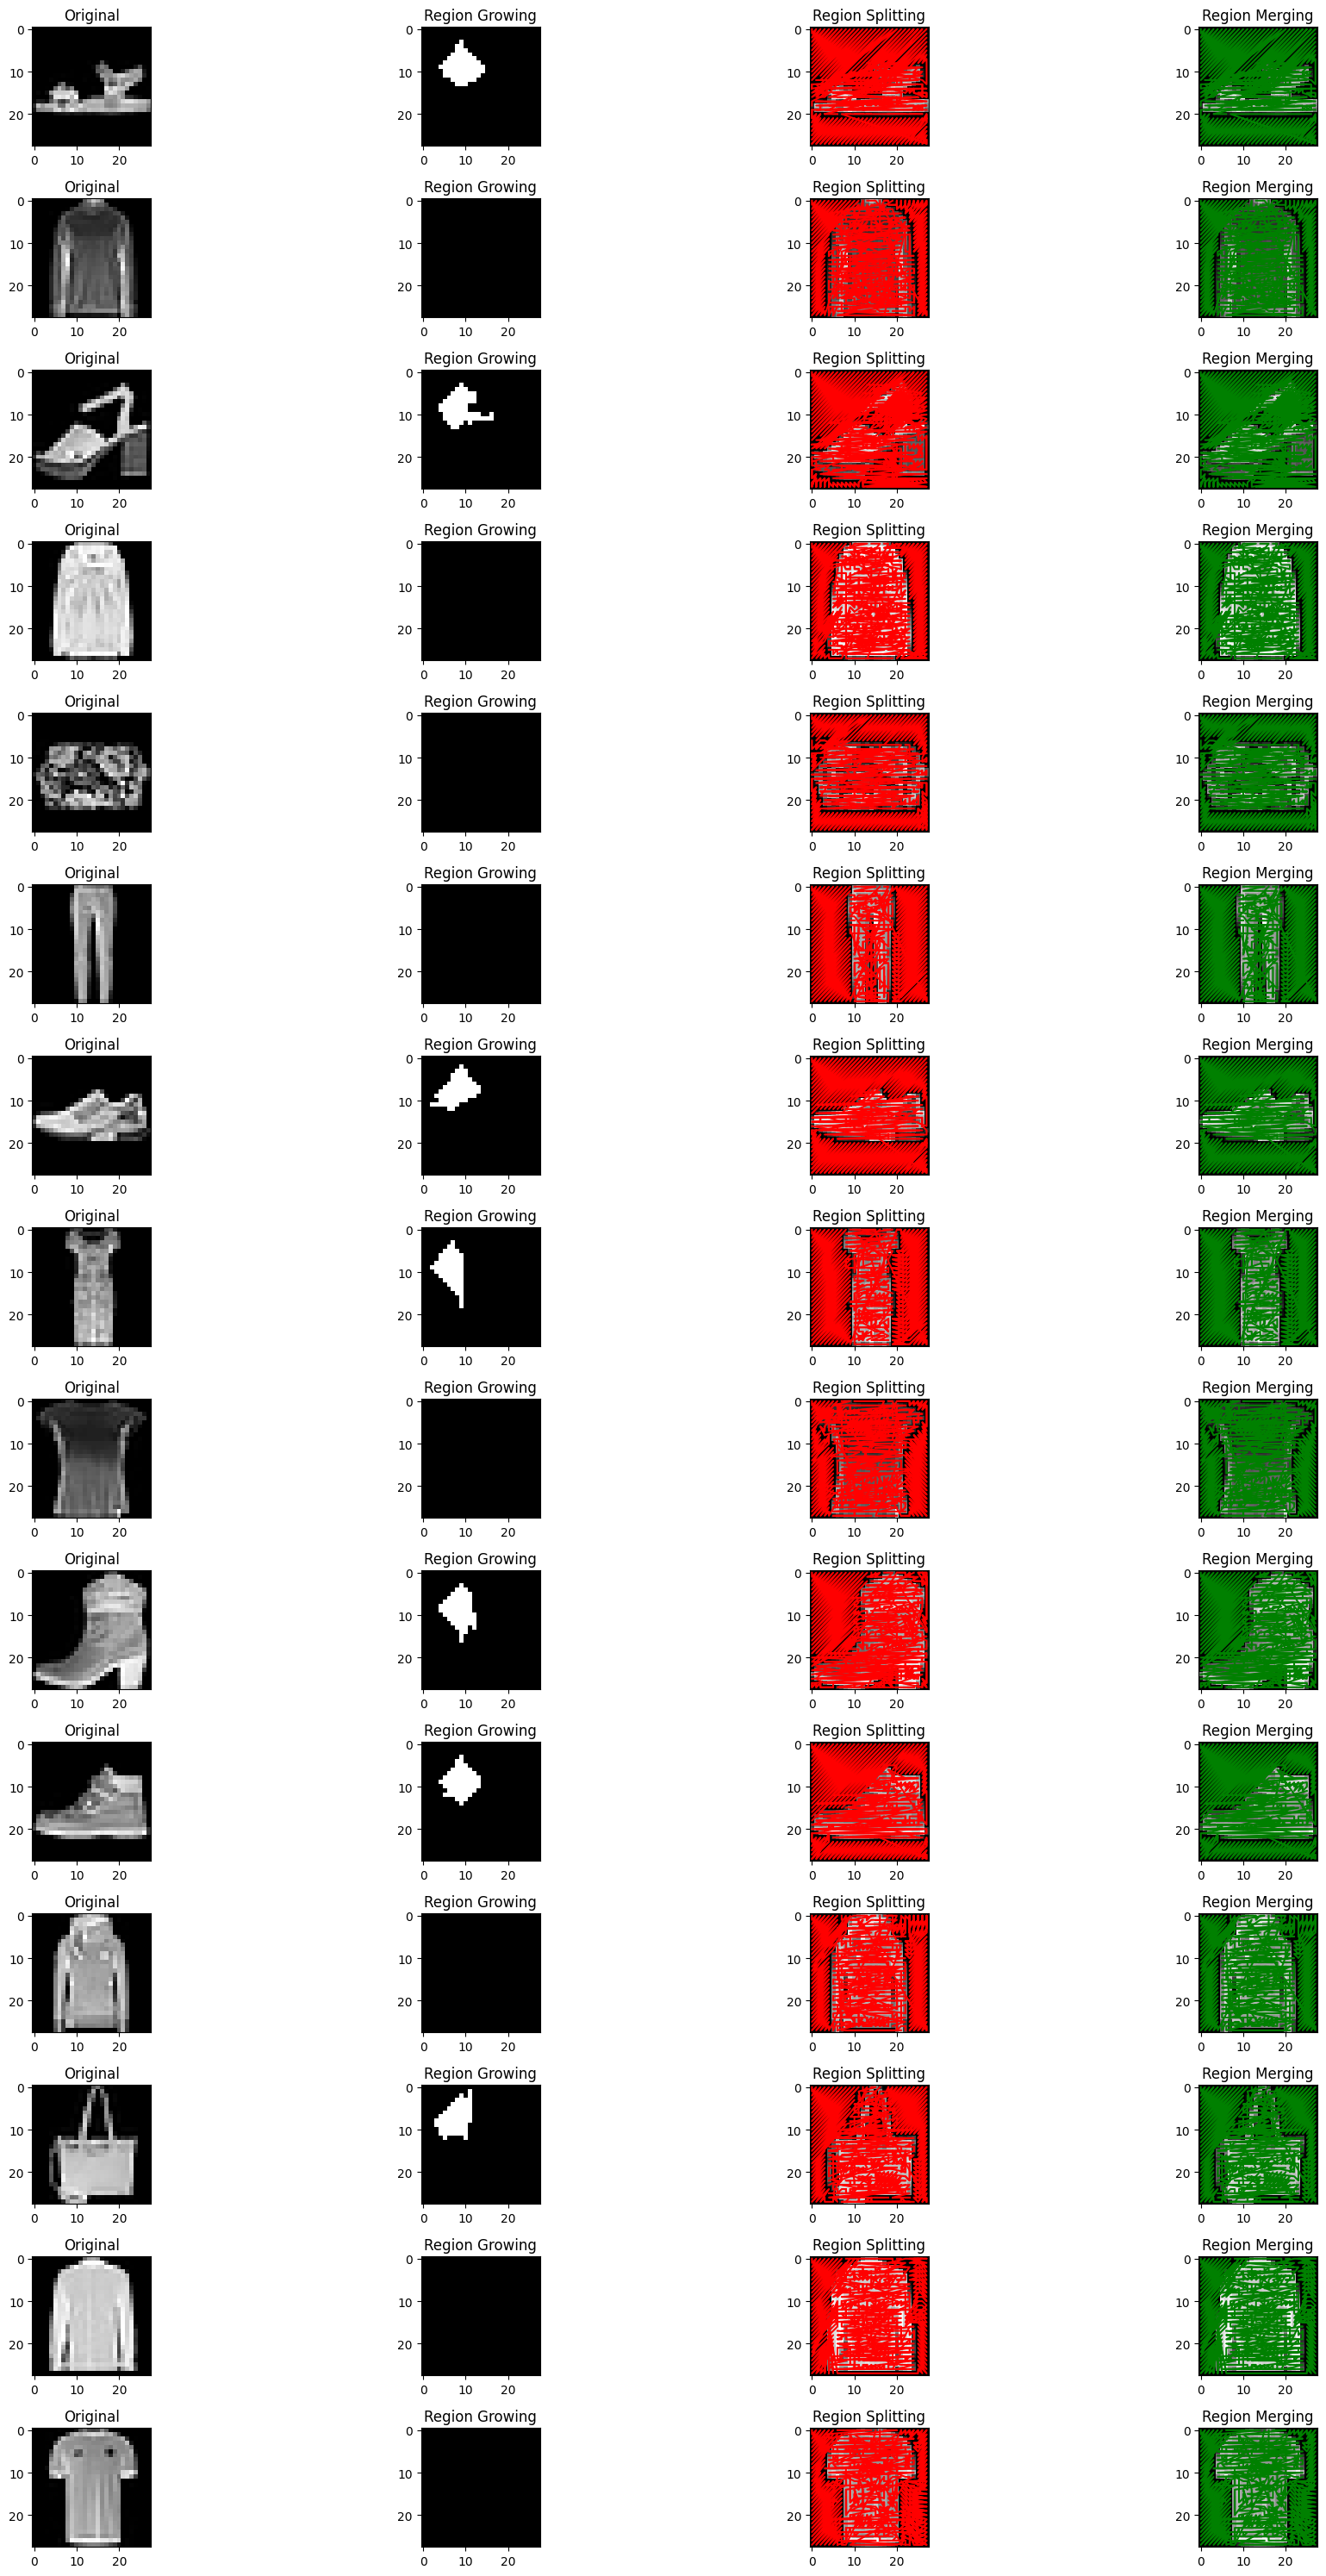

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

(train_images, _), _ = fashion_mnist.load_data()

def region_growing(image, seed, threshold):
    height, width = image.shape
    visited = np.zeros((height, width), dtype=bool)
    segmented_image = np.zeros_like(image)

    queue = [seed]
    while queue:
        current_point = queue.pop(0)
        x, y = current_point

        if not visited[x, y]:
            if abs(image[x, y] - np.mean(segmented_image)) < threshold:
                segmented_image[x, y] = 255
                visited[x, y] = True
                if x > 0:
                    queue.append((x - 1, y))
                if x < height - 1:
                    queue.append((x + 1, y))
                if y > 0:
                    queue.append((x, y - 1))
                if y < width - 1:
                    queue.append((x, y + 1))

    return segmented_image
def region_splitting(image, threshold):
    regions = []
    height, width = image.shape
    visited = np.zeros((height, width), dtype=bool)

    def explore_region(start_point):
        region = []
        queue = [start_point]

        while queue:
            current_point = queue.pop(0)
            x, y = current_point

            if not visited[x, y]:
                visited[x, y] = True
                region.append(current_point)
                if x > 0 and abs(image[x, y] - image[x-1, y]) < threshold:
                    queue.append((x - 1, y))
                if x < height - 1 and abs(image[x, y] - image[x+1, y]) < threshold:
                    queue.append((x + 1, y))
                if y > 0 and abs(image[x, y] - image[x, y-1]) < threshold:
                    queue.append((x, y - 1))
                if y < width - 1 and abs(image[x, y] - image[x, y+1]) < threshold:
                    queue.append((x, y + 1))

        return region

    for i in range(height):
        for j in range(width):
            if not visited[i, j]:
                region = explore_region((i, j))
                regions.append(region)

    return regions
def region_merging(regions, threshold):
    merged_regions = []
    for region in regions:
        mean_intensity = np.mean([train_images[pixel[0], pixel[1]] for pixel in region])
        for merged_region in merged_regions:
            if abs(mean_intensity - np.mean([train_images[pixel[0], pixel[1]] for pixel in merged_region])) < threshold:
                merged_region.extend(region)
                break
        else:
            merged_regions.append(region)
    return merged_regions

random_indices = np.random.randint(0, train_images.shape[0], size=15)

plt.figure(figsize=(20, 30))
for i, idx in enumerate(random_indices):
    random_image = train_images[idx]
    seed_point = (random_image.shape[0] // 3, random_image.shape[1] //3)
    threshold_rg = 20
    segmented_image_rg = region_growing(random_image, seed_point, threshold_rg)
    threshold_rs = 20
    regions = region_splitting(random_image, threshold_rs)
    merged_regions = region_merging(regions, threshold_rs)
    plt.subplot(15, 4, i * 4 + 1)
    plt.imshow(random_image, cmap='gray')
    plt.title('Original')

    plt.subplot(15, 4, i * 4 + 2)
    plt.imshow(segmented_image_rg, cmap='gray')
    plt.title('Region Growing')

    plt.subplot(15, 4, i * 4 + 3)
    plt.imshow(random_image, cmap='gray')
    for region in regions:
        plt.plot([pixel[1] for pixel in region], [pixel[0] for pixel in region], 'r')
    plt.title('Region Splitting')

    plt.subplot(15, 4, i * 4 + 4)
    plt.imshow(random_image, cmap='gray')
    for region in merged_regions:
        plt.plot([pixel[1] for pixel in region], [pixel[0] for pixel in region], 'g')
    plt.title('Region Merging')

plt.tight_layout()
plt.show()


In [ ]:

# Reading Image

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

image = mpimg.imread('/content/car.jpeg')
plt.imshow(image)

image_new = mpimg.imread('/content/sl.jpeg')
plt.imshow(image_new)

image_gray = mpimg.imread('/content/car_gray.png')
plt.imshow(image_gray)

import numpy as np

# Grayscale

def grayscale(image):
  return np.dot(image[...,:3],[0.2989, 0.5870, 0.1140]).astype(np.uint8)

gray_image = grayscale(image)
plt.imshow(gray_image, cmap = "gray")

def greyscale(image):
    og_shape=image.shape
    flat_img=image.flatten()
    L=flat_img.max()
    new_img=[]
    for pixel in flat_img:
        new_img.append(L-1-pixel)
    return np.array(new_img).reshape(og_shape).astype(np.uint8)

greyscale(image)

def grayscale(image):
  plt.imshow(np.dot(image[...,:3],[0.2989,0.5870,0.1140]),cmap="gray")

print(gray_image)

gray_image = grayscale(image_new)


# Merge and Split

def merge_regions(regions):
    while True:
        merged = False
        new_regions = []
        while regions:
            current = regions.pop()
            was_merged = False
            for idx, region in enumerate(new_regions):
                if abs(np.mean(region) - np.mean(current)) < 5:
                    new_regions[idx] = np.vstack([region, current])
                    was_merged = True
                    merged = True
                    break
            if not was_merged:
                new_regions.append(current)
        regions = new_regions
        if not merged:
            break
    return regions


def split_and_merge(image, num_regions):
    rows, cols = image.shape
    step = rows // num_regions
    regions = [np.arange(i, min(i + step, rows)) for i in range(0, rows, step)]
    regions = merge_regions(regions)

    output_image = np.zeros_like(image)
    for region in regions:
        for row in region:
            output_image[row, :] = ((np.mean(image[region, :]) - image[row, :]) < 10) * 255
    return output_image


split_merged_image = split_and_merge(gray_image, 4)

plt.imshow(split_merged_image, cmap="gray")



# **butterworth**

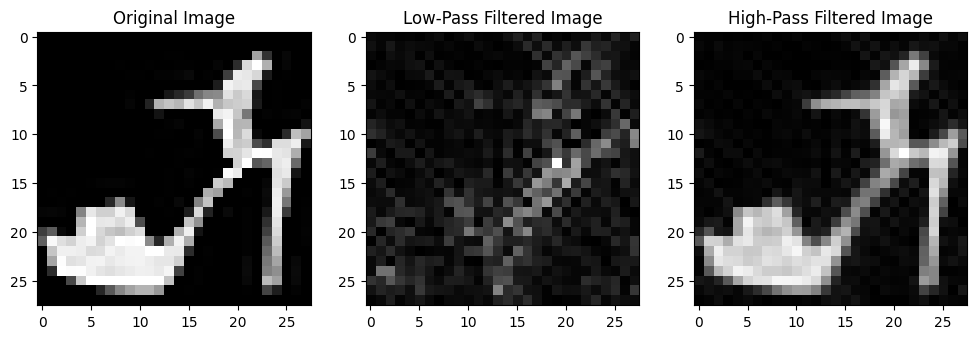

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def butterworth_low_pass(image, cutoff, order):
    fft_image = np.fft.fft2(image)
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    radius = int(rows / 2.5)
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - center[0])**2 + (y - center[1])**2 <= radius*radius
    mask[mask_area] = 1

    fft_masked = fft_image * mask
    filtered_image = np.fft.ifft2(fft_masked)
    filtered_image = np.abs(filtered_image)

    return filtered_image

def butterworth_high_pass(image, cutoff, order):
    fft_image = np.fft.fft2(image)

    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    radius = int(rows / 2.5)
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - center[0])**2 + (y - center[1])**2 > radius*radius
    mask[mask_area] = 1

    fft_masked = fft_image * mask

    filtered_image = np.fft.ifft2(fft_masked)

    filtered_image = np.abs(filtered_image)

    return filtered_image

# Example usage
image = np.random.rand(512, 512)  # Example image
cutoff = 20  # Cutoff frequency
order = 2     # Order of the filter

# Apply the low-pass filter
lp_filtered_image = butterworth_low_pass(img, cutoff, order)

# Apply the high-pass filter
hp_filtered_image = butterworth_high_pass(img, cutoff, order)

# Display the original and filtered images
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(lp_filtered_image, cmap='gray'), plt.title('Low-Pass Filtered Image')
plt.subplot(133), plt.imshow(hp_filtered_image, cmap='gray'), plt.title('High-Pass Filtered Image')
plt.show()


4422102/4422102 [==============================] - 0s 0us/step


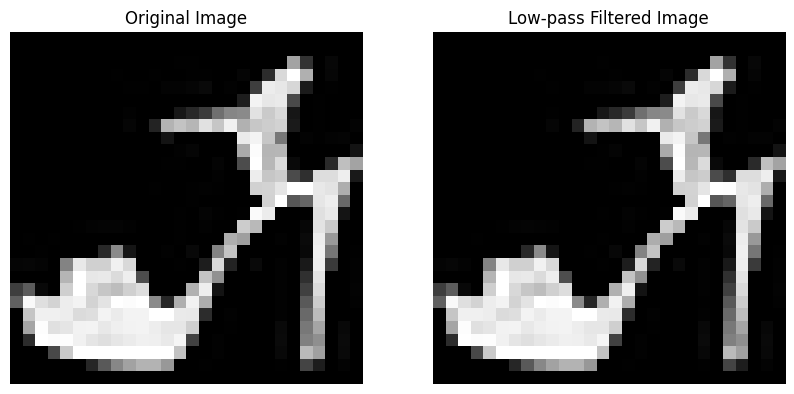

<ipython-input-9-cff476e7ca68>:48: RuntimeWarning: divide by zero encountered in scalar divide
  H_highpass[i, j] = 1 / (1 + (D0 / D)**o)


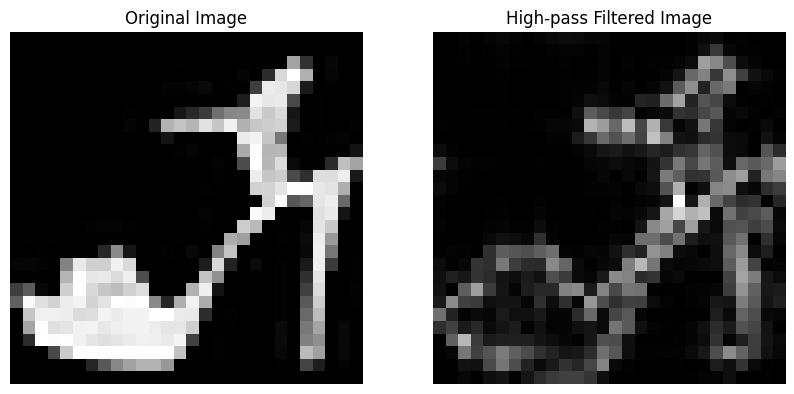

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras.datasets import fashion_mnist

(train_images, _), _ = fashion_mnist.load_data()
img=train_images[9]
h, w = img.shape

# Perform FFT and shift zero-frequency component to the center
F = np.fft.fft2(img)
Fshift = np.fft.fftshift(F)

D0 = 50
o = 2

# Butterworth low-pass filter
H_lowpass = np.zeros((h, w), dtype=np.float32)
for i in range(h):
    for j in range(w):
        D = np.sqrt((i - h / 2)**2 + (j - w / 2)**2)
        H_lowpass[i, j] = 1 / (1 + (D / D0)**(2 * o))

# Apply the low-pass filter
Gshift_lowpass = Fshift * H_lowpass
G_lowpass = np.fft.ifftshift(Gshift_lowpass)
g_lowpass = np.abs(np.fft.ifft2(G_lowpass))

# Display the result of the low-pass filter
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(g_lowpass, cmap='gray')
plt.title('Low-pass Filtered Image')
plt.axis('off')

plt.show()

# Butterworth high-pass filter
H_highpass = np.zeros((h, w), dtype=np.float32)
for i in range(h):
    for j in range(w):
        D = np.sqrt((i - h / 2)**2 + (j - w / 2)**2)
        H_highpass[i, j] = 1 / (1 + (D0 / D)**o)

# Apply the high-pass filter
Gshift_highpass = Fshift * H_highpass
G_highpass = np.fft.ifftshift(Gshift_highpass)
g_highpass = np.abs(np.fft.ifft2(G_highpass))

# Display the result of the high-pass filter
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(g_highpass, cmap='gray')
plt.title('High-pass Filtered Image')
plt.axis('off')

plt.show()
